In [22]:
import pandas as pd

from helpers.load_data import (
    get_data_with_cpu,
    get_experiments_paths,
    trim_experiment,
)
from helpers.regression import (
    boxplot_two,
    draw_regression_graph,
    fit_regression,
)

experiments_path = '../../data'

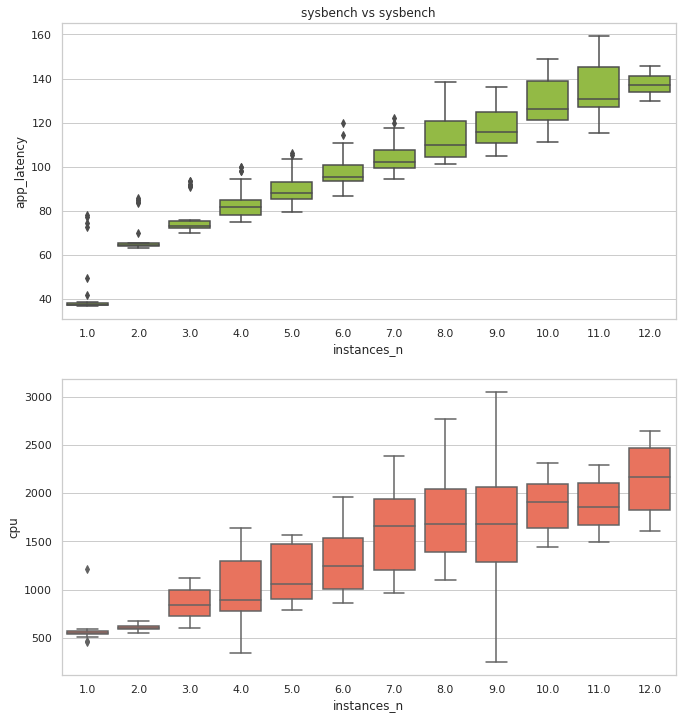

In [15]:
experiment_name = 'sysbench_1_sysbench_11'
path = list(get_experiments_paths(experiment_name, experiments_path))[0]
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
boxplot_two(var_1='app_latency', var_2='cpu', df=df, figsize=(11, 12), title='sysbench vs sysbench')

In [13]:
results = fit_regression(df, 'app_latency ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2281.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.33e-152
Time:                        14:50:25   Log-Likelihood:                -1281.5
No. Observations:                 341   AIC:                             2567.
Df Residuals:                     339   BIC:                             2575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      48.3899      1.218     39.742      

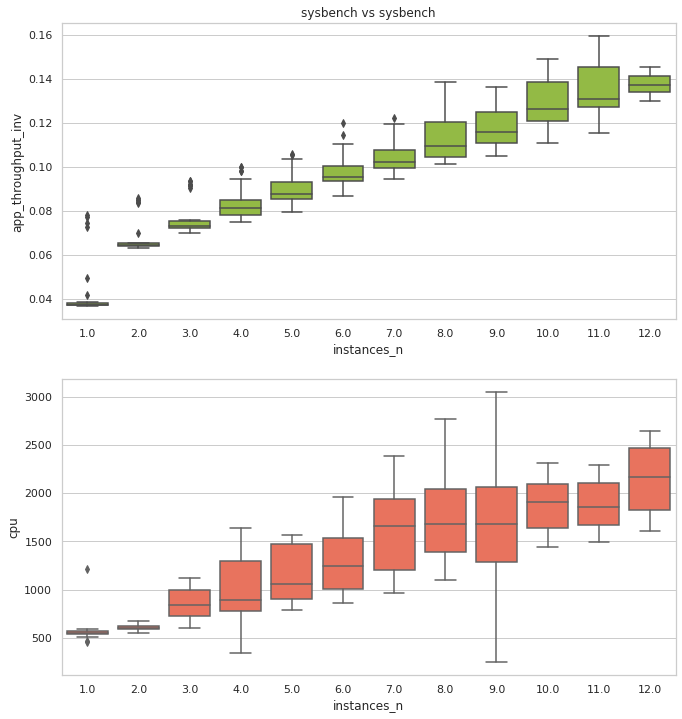

In [6]:
experiment_name = 'sysbench_1_sysbench_11'
path = list(get_experiments_paths(experiment_name, experiments_path))[0]
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
boxplot_two(var_1='app_throughput_inv', var_2='cpu', df=df, figsize=(11, 12), title='sysbench vs sysbench')

In [14]:
results = fit_regression(df, 'app_throughput_inv ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2281.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.37e-152
Time:                        14:51:13   Log-Likelihood:                 1074.0
No. Observations:                 341   AIC:                            -2144.
Df Residuals:                     339   BIC:                            -2136.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0484      0.001     39.744      

In [17]:
results = fit_regression(df, 'app_throughput_inv ~ app_latency')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.300e+08
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:54:52   Log-Likelihood:                 3014.7
No. Observations:                 341   AIC:                            -6025.
Df Residuals:                     339   BIC:                            -6018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.282e-06   6.86e-06      0.916      

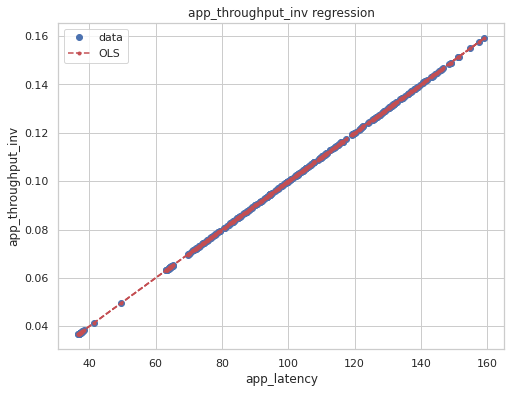

In [23]:
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='app_latency')